In [17]:
%load_ext autoreload
%autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import tensorflow as tf
import tensorflow.keras as keras
from model_tools import load_dataset, load_valset
import time

In [19]:

import matplotlib.pyplot as plt

In [20]:
Model_Name = 'full_conv3_0'

In [21]:
trained_model = keras.models.load_model('saved_model/'+Model_Name)

In [22]:
val_ds = load_valset('val_image',10)

In [23]:
img_batch, mask_batch = list(val_ds.take(1).as_numpy_iterator())[0]
print(img_batch.shape)
print(mask_batch.shape)

(32, 200, 200, 3)
(32, 100, 100)


In [24]:
st = time.time()
predict_batch = trained_model(img_batch)
print('took:{}'.format(time.time()-st))

took:0.4304847717285156


In [25]:
print(predict_batch.shape)

(32, 100, 100)


In [26]:
import numpy as np

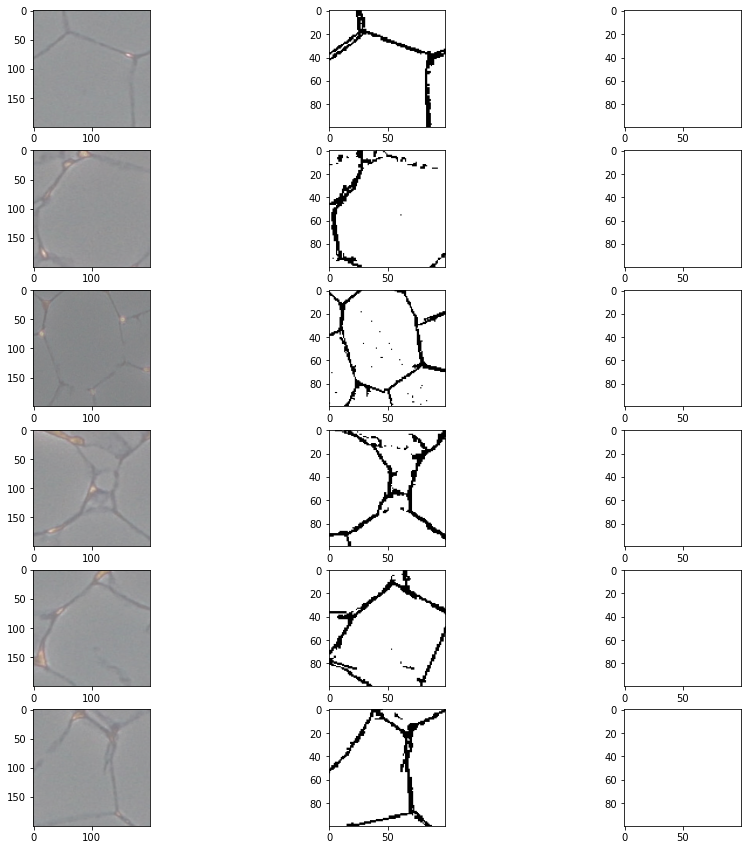

In [27]:
fig = plt.figure(figsize=(15,15))
i = 1
n = 6
for img, mask, pred in zip(img_batch[:n],mask_batch[:n],predict_batch[:n]):
    ax = fig.add_subplot(n,3,i)
    ax.imshow(img)
    ax = fig.add_subplot(n,3,i+1)
    ax.imshow(mask, cmap='binary')
    ax = fig.add_subplot(n,3,i+2)
    ax.imshow(pred, cmap='binary')
    i += 3
plt.show()

In [28]:
print(predict_batch[0][0])

tf.Tensor(
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5], shape=(100,), dtype=float32)
